## Part I: Data Pre-processing

In [15]:
import pandas as pd

In [16]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2024-10-10 02:40:50--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.163.59, 142.251.42.251, 142.250.196.219, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.163.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.5’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.02s   

2024-10-10 02:40:50 (23.9 MB/s) - ‘questions-words.txt.5’ saved [603955/603955]



In [17]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [4]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [5]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.

questions = []
categories = []
sub_categories = []

current_category = None
count = 0

for entry in data:
    if entry.startswith(":"):
        current_category = entry
        count += 1
    else:
        questions.append(entry)
        if count <= 5:
            categories.append('Semantic')
        else:
            categories.append('Syntactic')

        sub_categories.append(current_category)

In [6]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [7]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries
2,Athens Greece Beijing China,Semantic,: capital-common-countries
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries


In [8]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [19]:
data = pd.read_csv("questions-words.csv")

In [72]:
MODEL_NAME = "fasttext-wiki-news-subwords-300"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

The Gensim model loaded successfully!


In [73]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
    # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
    # You should also preserve the gold answers during iterations for evaluations later.
    """ Hints
    # Unpack the analogy (e.g., "man", "woman", "king", "queen")
    # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
    # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
    # Mikolov et al., 2013: big - biggest and small - smallest
    # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
    """

    words = analogy.split()
    word_a, word_b, word_c, word_d = words
    try:
        result = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)
        predicted_word = result[0][0]
        preds.append(predicted_word)
        golds.append(word_d)
    except KeyError as e:
        preds.append(None)
        golds.append(word_d)


100%|█████████████████████████████████████████████████████████████████████████████| 19544/19544 [20:33<00:00, 15.85it/s]


In [74]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 85.22945089638065%
Category: Syntactic, Accuracy: 88.96487119437938%
Sub-Category: capital-common-countries, Accuracy: 98.41897233201581%
Sub-Category: capital-world, Accuracy: 95.44650751547303%
Sub-Category: currency, Accuracy: 37.644341801385686%
Sub-Category: city-in-state, Accuracy: 80.54316984191325%
Sub-Category: family, Accuracy: 84.98023715415019%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 69.65725806451613%
Sub-Category: gram2-opposite, Accuracy: 60.71428571428571%
Sub-Category: gram3-comparative, Accuracy: 96.92192192192192%
Sub-Category: gram4-superlative, Accuracy: 99.19786096256684%
Sub-Category: gram5-present-participle, Accuracy: 97.72727272727273%
Sub-Category: gram6-nationality-adjective, Accuracy: 92.74546591619762%
Sub-Category: gram7-past-tense, Accuracy: 83.78205128205128%
Sub-Category: gram8-plural, Accuracy: 94.51951951951952%
Sub-Category: gram9-plural-verbs, Accuracy: 95.17241379310344%


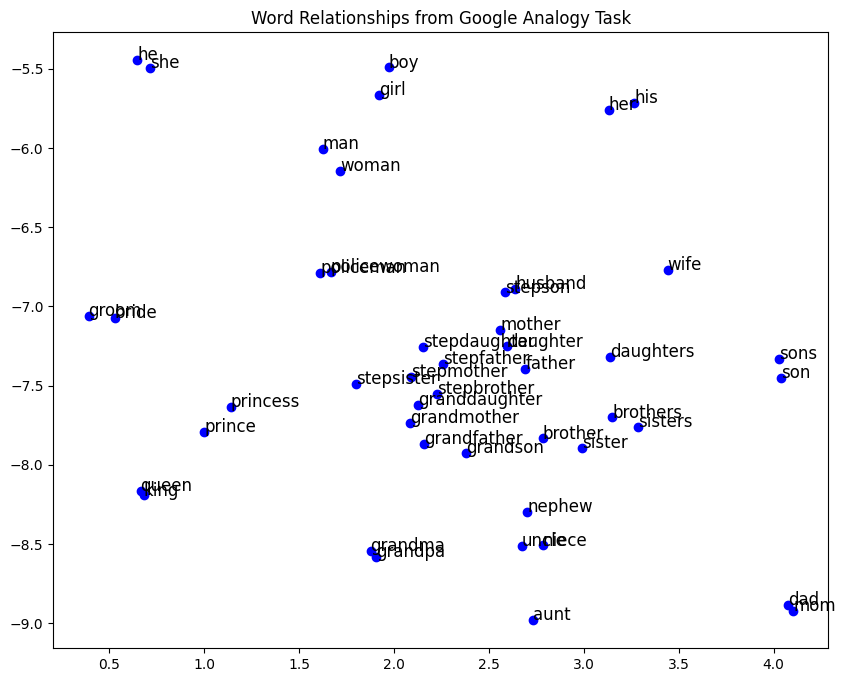

<Figure size 640x480 with 0 Axes>

In [90]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`

family_data = data[data["SubCategory"] == SUB_CATEGORY]
words = set(word for analogy in family_data["Question"] for word in analogy.split())
valid_words, word_vectors = zip(*[(word, model[word]) for word in words if word in model])

word_embeddings_2d = TSNE(n_components=2, random_state=1026).fit_transform(np.array(word_vectors))

plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], color='blue')
for i, word in enumerate(valid_words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]), fontsize=12)

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1J0os1846PQ129t720aI0wMm-5GepEwSl -O wiki_texts_part_0.txt.gz
!gdown --id 1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW -O wiki_texts_part_1.txt.gz
!gdown --id 1koiw6RFNzDe6pe2zMTfVhsEKmpmnYyu5 -O wiki_texts_part_2.txt.gz
!gdown --id 1YSGbDqhbg2xJsWD_hYQ5z9URl0dCTC2m -O wiki_texts_part_3.txt.gz
!gdown --id 1PA3C99C8CcLFjkenT0a9iU07XEQmXyG_ -O wiki_texts_part_4.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl
From (redirected): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl&confirm=t&uuid=965cc5e2-bc64-487e-8b8e-2706789f8fad
To: /content/wiki_texts_part_0.txt.gz
100% 1.51G/1.51G [00:27<00:00, 53.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW
From (redirected): https://drive.google.com/uc?id=1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW&confirm=t&uuid=f49ca1d5-a900-4f8e-8b52-49c30af7b739
To: /content/

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX -O wiki_texts_part_5.txt.gz
!gdown --id 1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb -O wiki_texts_part_6.txt.gz
!gdown --id 1ain2DN1nxXfsmJ2Aj9TFZlLVJSPsu9Jb -O wiki_texts_part_7.txt.gz
!gdown --id 1UKhvielQDqQz5pMZ7J3SHv9m8_8gO-dE -O wiki_texts_part_8.txt.gz
!gdown --id 1q1zMA4hbMS7tID2GTQx-c94UPB8YQaaa -O wiki_texts_part_9.txt.gz
!gdown --id 1-kkGxwMxPsoGg5_2pdaOeE3Way6njLpH -O wiki_texts_part_10.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX
From (redirected): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX&confirm=t&uuid=ebafdbc4-5c55-469c-8148-5dad324db9fc
To: /content/wiki_texts_part_5.txt.gz
100% 578M/578M [00:07<00:00, 75.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb
From (redirected): https://drive.google.com/uc?id=1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb&confirm=t&uuid=e33a5654-c139-425d-b128-1a63789ff163
To: /content/wi

In [47]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

In [48]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [ ]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [64]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random
from itertools import islice

wiki_txt_path = "wiki_texts_combined.txt"
output_path = "wiki_texts_output_30.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.
total_lines = 562365 * 10 + 5
sample_size = int(total_lines * 0.3)
sample_lines = sorted(random.sample(range(total_lines), sample_size))

with open(wiki_txt_path, "r", encoding="utf-8") as f:
    with open(output_path, "w", encoding="utf-8") as output_file:
        current_position = 0

        for line_number in sample_lines:
            target_line = next(islice(f, line_number - current_position - 1, line_number - current_position), None)
            try:
                output_file.write(target_line)
            except:
                None
            current_position = line_number

In [ ]:
#Pre-Process

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove non-English words
    text = re.sub(r'[^\w\s\'-]', '', text)
    
    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization : https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

input_file = "wiki_texts_output_20.txt"
output_file = "preprocessed_wiki_texts_v3.txt"

with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8") as outfile:
    for line in infile:
        processed_line = preprocess_text(line)
        outfile.write(processed_line + "\n")

[nltk_data] Downloading package punkt to /home/wei516/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wei516/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
import re
from gensim.models import FastText
from gensim.models.word2vec import LineSentence
from tqdm import tqdm
import multiprocessing
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    text = re.sub(r'[^\w\s\'-]', '', text)
    text = text.strip()
    text = " ".join(text.split())
    
    # Remove stop words
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization : https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
    words = [lemmatizer.lemmatize(word) for word in words]
    
    fdist = nltk.FreqDist(words)
    words = [word for word in words if fdist[word] < fdist.N() * 0.1]

    return ' '.join(words)

def process_chunk(chunk):
    return [preprocess_text(line) for line in chunk]

def preprocess_file(input_file, output_file, chunk_size=1000):
    with open(input_file, "r", encoding="utf-8") as infile:
        lines = infile.readlines()

    chunks = [lines[i:i + chunk_size] for i in range(0, len(lines), chunk_size)]

    num_processes = max(1, os.cpu_count() // 2)  # Use half of available CPUs
    
    with multiprocessing.Pool(num_processes) as pool:
        processed_chunks = list(tqdm(pool.imap(process_chunk, chunks), total=len(chunks)))
    
    with open(output_file, "w", encoding="utf-8") as outfile:
        for chunk in processed_chunks:
            outfile.writelines(line + '\n' for line in chunk)

def train_word_embeddings(input_file, model_output):
    sentences = LineSentence(input_file)
    model = FastText(
        sentences,
        vector_size=300,
        window=10,
        min_count=5,
        negative=10,
        sample=1e-4, 
        workers=40,
        epochs=10,
        sg=1
    )
    model.save(model_output)
    return model

input_file = "wiki_texts_output_30.txt"
output_file = "preprocessed_wiki_texts_v6.txt"
model_output = "fasttext_model.bin"

preprocess_file(input_file, output_file)
model = train_word_embeddings(output_file, model_output)

100%|███████████████████████████████████████████████████████████████████████████████| 1688/1688 [04:23<00:00,  6.40it/s]


In [67]:
import pandas as pd
data = pd.read_csv("questions-words.csv")

In [68]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      words = analogy.split()
      word_a, word_b, word_c, word_d = words
      try:
          result = model.wv.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)
          predicted_word = result[0][0]
          preds.append(predicted_word)
          golds.append(word_d)
      except KeyError as e:
          preds.append(None)
          golds.append(word_d)

 31%|████████████████████████▏                                                     | 6058/19544 [08:06<15:44, 14.27it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|█████████████████████████████████████████████████████████████████████████████| 19544/19544 [25:25<00:00, 12.81it/s]


In [ ]:
print(preds)

In [69]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 2.25504566467471%
Category: Syntactic, Accuracy: 29.20843091334895%
Sub-Category: capital-common-countries, Accuracy: 0.0%
Sub-Category: capital-world, Accuracy: 0.0%
Sub-Category: currency, Accuracy: 1.7321016166281753%
Sub-Category: city-in-state, Accuracy: 0.0%
Sub-Category: family, Accuracy: 36.56126482213439%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 46.67338709677419%
Sub-Category: gram2-opposite, Accuracy: 19.950738916256157%
Sub-Category: gram3-comparative, Accuracy: 62.83783783783784%
Sub-Category: gram4-superlative, Accuracy: 24.15329768270945%
Sub-Category: gram5-present-participle, Accuracy: 46.78030303030303%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.0%
Sub-Category: gram7-past-tense, Accuracy: 43.84615384615385%
Sub-Category: gram8-plural, Accuracy: 0.07507507507507508%
Sub-Category: gram9-plural-verbs, Accuracy: 23.678160919540232%


In [9]:
print(len(word_vectors)) 

46


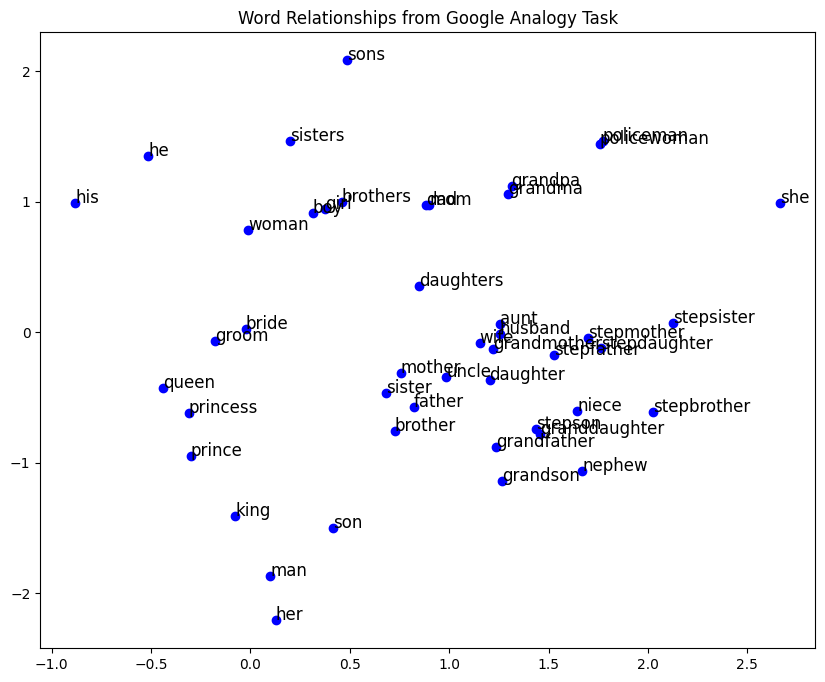

<Figure size 640x480 with 0 Axes>

In [71]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`

family_data = data[data["SubCategory"] == SUB_CATEGORY]
words = set(word for analogy in family_data["Question"] for word in analogy.split())
valid_words, word_vectors = zip(*[(word, model.wv[word]) for word in words if word in model.wv])


word_embeddings_2d = TSNE(n_components=2, perplexity=min(30, len(word_vectors) - 1), random_state=11).fit_transform(np.array(word_vectors))

plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], color='blue')
for i, word in enumerate(valid_words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]), fontsize=12)

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")